## Overview

In 2017, [Kaggle](https://www.kaggle.com) conducted a survey on a large range of users registered as the data scientist in their platform. The survey data are broadly covered the skill set of the data scientists, the demographic of the data scientists, the feedback of the platform and many other information. Participants' answers to multiple choice questions. Each column contains the answers of one respondent to a specific question: [MCQResponses.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/MCQResponses.csv)      

### 1.0. Libraries and data files

In [ ]:
!pip install wget

import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import wget
import seaborn as sns
sns.set(style="whitegrid")

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/MCQResponses.csv'
DataSet = wget.download(link_to_data)
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/ConversionRates.csv'
DataSet = wget.download(link_to_data)
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv'
DataSet = wget.download(link_to_data)

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=7c7e77a076fe9514df8a038018d45f3ca95b55bbc4daa4840e7903be65f328b8
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_demog = pd.read_csv('MCQResponses.csv') #Load MCQResponses.csv into dataframe df_demog
df_demog.head() #Print its top 5 rows

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction
0,Male,United States,56,"Independent contractor, freelancer, or self-em...",Yes,Operations Research Practitioner,Poorly,Self-employed,TensorFlow,Neural Nets,Python,Master's degree,Mathematics or statistics,University courses,250000.0,USD,10 - Highly Satisfied
1,Female,Australia,43,Employed full-time,Yes,Business Analyst,Fine,Employed by non-profit or NGO,Microsoft Excel Data Mining,Link Analysis,Python,Bachelor's degree,NaN,Work,80000.0,AUD,7
2,Male,Russia,33,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by a company that doesn't perform adv...,C/C++,Deep learning,Python,Bachelor's degree,Other,Self-taught,1200000.0,RUB,7
3,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7
4,Male,Taiwan,26,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by professional services/consulting firm,TensorFlow,Deep learning,Python,Master's degree,Computer Science,"Online courses (coursera, udemy, edx, etc.)",1100000.0,TWD,5


In [ ]:
# Check which columns have NAs
print("Does this column have NaNs? (False = No; True = Yes)\n", df_demog.isna().any())

Does this column have NaNs? (False = No; True = Yes)
 GenderSelect                    False
Country                         False
Age                             False
EmploymentStatus                False
CodeWriter                      False
CurrentJobTitleSelect           False
TitleFit                         True
CurrentEmployerType              True
MLToolNextYearSelect             True
MLMethodNextYearSelect           True
LanguageRecommendationSelect     True
FormalEducation                 False
MajorSelect                      True
FirstTrainingSelect              True
CompensationAmount              False
CompensationCurrency            False
JobSatisfaction                  True
dtype: bool


In [ ]:
# For each of those columns, display how many records with values
print("Number of values (not NaNs) in each column is:\n", df_demog.count())

Number of values (not NaNs) in each column is:
 GenderSelect                    4327
Country                         4327
Age                             4327
EmploymentStatus                4327
CodeWriter                      4327
CurrentJobTitleSelect           4327
TitleFit                        4251
CurrentEmployerType             4275
MLToolNextYearSelect            4206
MLMethodNextYearSelect          4170
LanguageRecommendationSelect    4228
FormalEducation                 4327
MajorSelect                     3952
FirstTrainingSelect             4324
CompensationAmount              4327
CompensationCurrency            4327
JobSatisfaction                 4317
dtype: int64


In [ ]:
# Filter Data scientist
df_demog_ds = df_demog[df_demog["CurrentJobTitleSelect"] == "Data Scientist"]
df_demog_ds.shape

(1263, 17)

### 1.1. Education
<a id="education"></a>
***
In data scientists job, education is important. Is it reasonable to ask data scientists to have a Master's or Doctoral degree? Let's find out. 


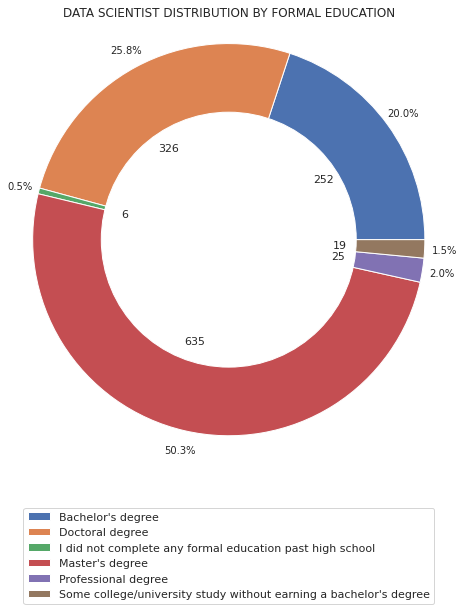

                                                   FormalEducation  Counts  Percentages(%)
                                                 Bachelor's degree     252            20.0
                                                   Doctoral degree     326            25.8
          I did not complete any formal education past high school       6             0.5
                                                   Master's degree     635            50.3
                                               Professional degree      25             2.0
 Some college/university study without earning a bachelor's degree      19             1.5


In [ ]:
#prepare plotting data
colors = sns.color_palette(None, 6)
labels, edu_counts = np.unique(df_demog_ds["FormalEducation"], return_counts=True)

#draw pie
plt.figure(figsize=(8,8))
plt.pie(edu_counts, colors=colors, labels = edu_counts, labeldistance = .53, 
        pctdistance = 1.1, autopct='%1.1f%%', startangle=0)

#draw circle
plt.gcf().gca().add_artist(plt.Circle((0,0),.65,fc='white'))

#add legend and title
plt.legend(labels, loc="lower center", bbox_to_anchor=(.50,-.35))
plt.title("DATA SCIENTIST DISTRIBUTION BY FORMAL EDUCATION", loc="center")
plt.axis('square')
plt.show()

#calculate percentages by education
edu_percentages = np.round(edu_counts/edu_counts.sum()*100,1)

#output text results
edu_table = {'FormalEducation': labels, 
        'Counts': edu_counts, 
        'Percentages(%)': edu_percentages} 
edu_output = pd.DataFrame(edu_table) 
print(edu_output.to_string(index=False))

### 1.2. Salary
<a id="salary"></a>

Data science is considered a very well paying role, let's find out the salary information. Since all of the respondents did not come from one country, we can assume that they gave their salaries in their countries currency. We have filtered the data for you and provided exchange rates in a file called *ConversionRates.csv* which should already be imported. 

In [ ]:
#Load ConversationRates.csv
df_rates = pd.read_csv('ConversionRates.csv')

#left join exchangeRates into df_demog
df_demog_merged = (pd.merge(df_demog, df_rates, how="left", 
                     left_on=["CompensationCurrency"], 
                     right_on=["originCountry"])).drop("originCountry", axis=1)

#calculate Compensation according to AUD
df_demog_merged["CompensationAmount"] = df_demog_merged["CompensationAmount"]*df_demog_merged["exchangeRate"]*0.80231
df_demog_merged = df_demog_merged.rename(columns={"CompensationAmount": "CompensationAUD"})

In [ ]:
print("Maximum DS salary in AUD is:", 
      round(df_demog_merged["CompensationAUD"].max(),2))

Maximum DS salary in AUD is: 8023099.2


In [ ]:
print("Median DS salary in AUD is:", 
      round(df_demog_merged["CompensationAUD"].median(),2))

Median DS salary in AUD is: 43279.89


In [ ]:
#dataset of Australian respondents
df_demog_aus_ds = df_demog_merged[df_demog_merged["Country"] == "Australia"]

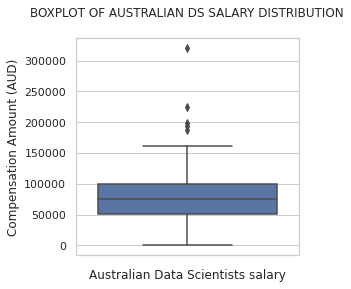

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(df_demog_aus_ds["CompensationAUD"], orient = "v")
plt.title("BOXPLOT OF AUSTRALIAN DS SALARY DISTRIBUTION\n")
plt.xlabel('Australian Data Scientists salary')
plt.ylabel("Compensation Amount (AUD)")
plt.show()

In [ ]:
print("Median Australian DS salary in AUD is:", 
      round(df_demog_aus_ds["CompensationAUD"].median(),2))
print("Maximum Australian DS salary in AUD is:", 
      round(df_demog_aus_ds["CompensationAUD"].max(),2))

Median Australian DS salary in AUD is: 74991.21
Maximum Australian DS salary in AUD is: 320924.0


In [ ]:
#either: replace unwanted values with the median of the rest
# df_demog_aus_ds.loc[(df_demog_aus_ds["CompensationAUD"] > 250000.0)|(df_demog_aus_ds["CompensationAUD"] < 40000.0), "CompensationAUD"] = np.median(df_demog_aus_ds.loc[(df_demog_aus_ds["CompensationAUD"] < 250000.0) & (df_demog_aus_ds["CompensationAUD"] > 40000.0), "CompensationAUD"])
#or: replace unwanted values with nan 
df_demog_aus_ds.loc[(df_demog_aus_ds["CompensationAUD"] > 250000.0)|(df_demog_aus_ds["CompensationAUD"] < 40000.0), "CompensationAUD"] = np.nan

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


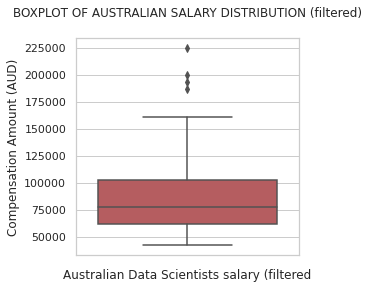

In [ ]:
#plot boxplot for filtered data
plt.figure(figsize=(4,4))
sns.boxplot(df_demog_aus_ds["CompensationAUD"], color = "r", orient = "v")
plt.title("BOXPLOT OF AUSTRALIAN SALARY DISTRIBUTION (filtered)\n")
plt.xlabel("Australian Data Scientists salary (filtered")
plt.ylabel("Compensation Amount (AUD)")
plt.show()

In [ ]:
#your code
print("Median Australian salary in AUD after filter is:", 
      round(df_demog_aus_ds["CompensationAUD"].median(),2))
print("Maximum Australian salary in AUD after filter is:", 
      round(df_demog_aus_ds["CompensationAUD"].max(),2))

Median Australian salary in AUD after filter is: 77244.16
Maximum Australian salary in AUD after filter is: 225295.47


### 1.3. Exploring the data scientist Demographics
<a id="demographics"></a>
***

#### 1.3.1 Age
<a id="age"></a>
Build a boxplot to explore the age of all data scientists.

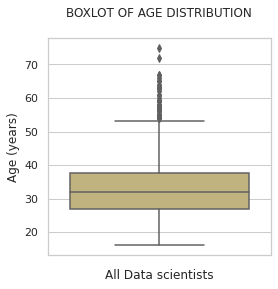

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(df_demog_ds["Age"], color= "y", orient = "v")
plt.title("BOXLOT OF AGE DISTRIBUTION\n")
plt.xlabel("All Data scientists")
plt.ylabel("Age (years)")
plt.show()

In [ ]:
# Calculate five descriptive statistics
# calculate quartiles
quartiles = percentile(df_demog_ds["Age"], [25, 50, 75])
# calculate min/max
minval, maxval = df_demog_ds["Age"].min(), df_demog_ds["Age"].max()
# print 5-number summary
print("Five descriptive statistics for age are:")
print('The minimum age is %.0f' % minval)
print('The Q1 value is %.0f' % quartiles[0])
print('The median age is %.0f' % quartiles[1])
print('The Q3 value is %.0f' % quartiles[2])
print('The maximum age is %.0f' % maxval)

Five descriptive statistics for age are:
The minimum age is 16
The Q1 value is 27
The median age is 32
The Q3 value is 38
The maximum age is 75


In [ ]:
# Mean 
print("The mean age is:", round(df_demog_ds["Age"].mean()))

The mean age is: 34


In [ ]:
# Median
print("The median age is:", round(df_demog_ds["Age"].median()))

The median age is: 32


In [ ]:
# How many data scientsits aged between 24 and 60?
f24t60 = df_demog_ds.loc[(df_demog_ds["Age"] > 24) & 
                     (df_demog_ds["Age"] < 60), "Age"].count()
print("Number of data scientists aged between 24 and 60 is:", f24t60, "person(s)")

Number of data scientists aged between 24 and 60 is: 1129 person(s)


In [ ]:
# How many respondents under 18?
u18 = df_demog_ds.loc[df_demog_ds["Age"] < 18, "Age"].count()
print("Number of data scientists aged under 18 is:", u18, "person(s)")

Number of data scientists aged under 18 is: 1 person(s)


#### 1.3.2 Gender
<a id="gender"></a>
We are interested in the gender of respondents. Nowadays, the gender equity is important for companies and organizations. 


In [ ]:
genders, gender_counts = np.unique(df_demog_ds["GenderSelect"], return_counts=True)

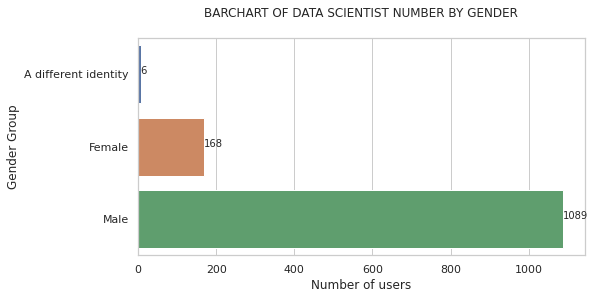

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(gender_counts, genders)
plt.title("BARCHART OF DATA SCIENTIST NUMBER BY GENDER\n")
for index, value in enumerate(gender_counts):
    plt.text(value, index, str(value))
plt.xlabel('Number of users')
plt.ylabel("Gender Group")
plt.show()

Now let's see if any relationship between gender and age

Create a box plot showing the age of all the data scientists according to gender (men, women and other identity).

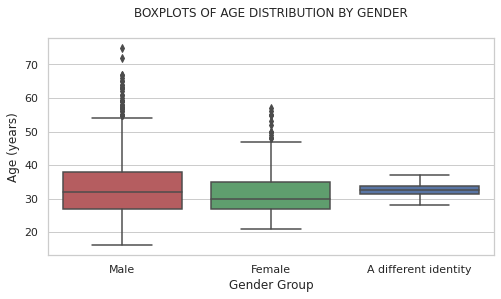

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x = df_demog_ds["GenderSelect"], 
            y = df_demog_ds["Age"], 
            palette=["r", "g", "b"])
plt.title("BOXPLOTS OF AGE DISTRIBUTION BY GENDER\n")
plt.xlabel("Gender Group")
plt.ylabel("Age (years)")
plt.show()

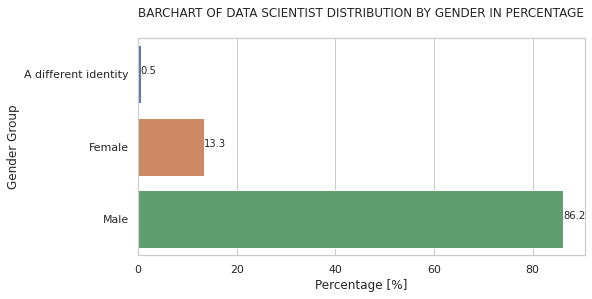

In [ ]:
#calculate percentages by gender
gender_percentages = gender_counts/gender_counts.sum()*100

#plot barchart
plt.figure(figsize=(8,4))
sns.barplot(gender_percentages, genders)
plt.title('BARCHART OF DATA SCIENTIST DISTRIBUTION BY GENDER IN PERCENTAGE\n')
for index, value in enumerate(gender_percentages):
    plt.text(value, index, str(round(value,1)))
plt.xlabel('Percentage [%]')
plt.ylabel('Gender Group')
plt.show()


#### 1.3.3 Country
<a id="country"></a>
The data scientists are working all over the world. The United States is regarded the largest data science community. India, China and some other countries are also having a fast growing recently. Is this true? Let's find out.

In [ ]:
# create and fill value into df_country
countries, country_counts = np.unique(df_demog_ds["Country"], return_counts=True)
df_country = pd.DataFrame({'Country': countries, 'Community Size': country_counts})
df_country_top5 = df_country.sort_values(by = "Community Size", ascending=False).head()
#output text results
print("Top 5 Data Scientest Communities are:")
print(df_country_top5.to_string(index=False))

Top 5 Data Scientest Communities are:
        Country  Community Size
  United States             414
          India             111
         France              60
 United Kingdom              55
        Germany              50


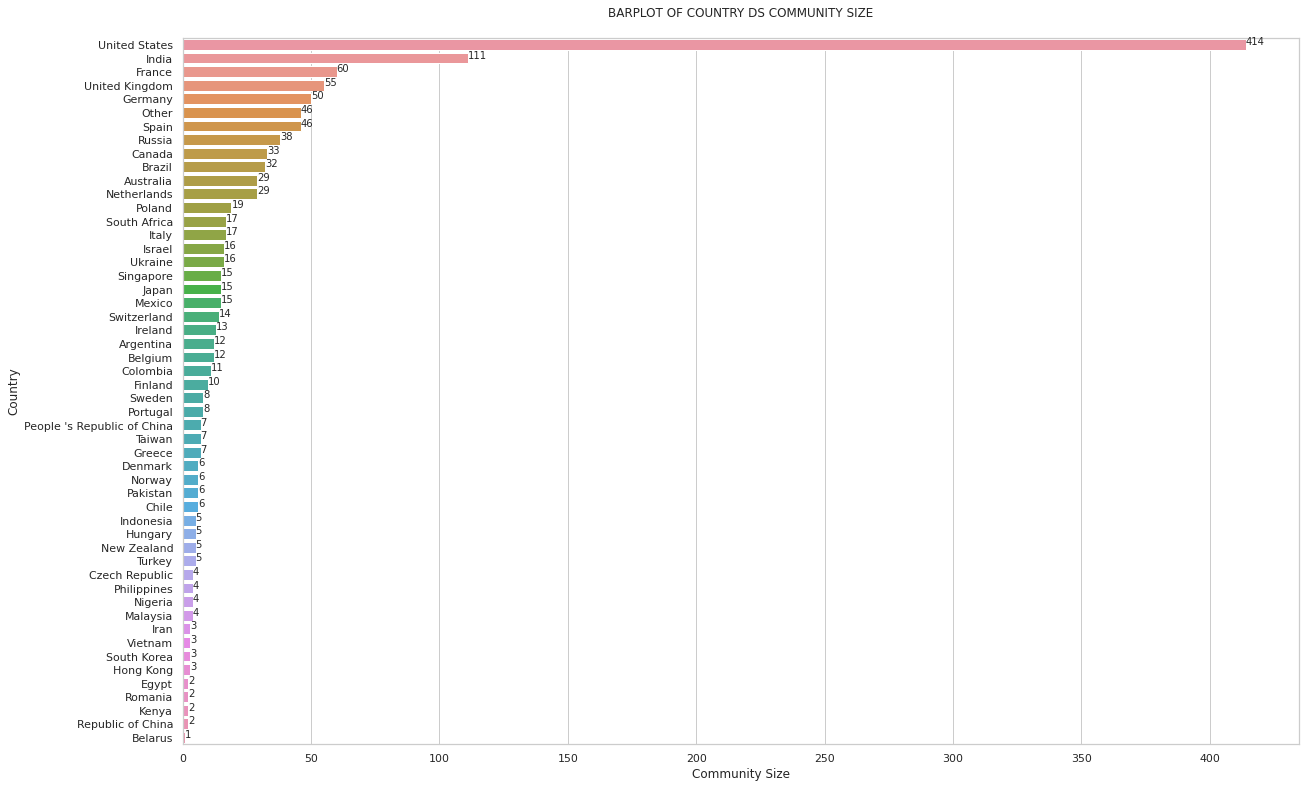

In [ ]:
# Show the Barplot of DS community size by country
plt.figure(figsize=(20,13))
sns.barplot(df_country.sort_values(by = "Community Size", ascending=False)["Community Size"], df_country.sort_values(by = "Community Size", ascending=False)["Country"])
for index, value in enumerate(df_country.sort_values(by = "Community Size", ascending=False)["Community Size"]):
    plt.text(value, index, str(round(value,1)))
plt.title("BARPLOT OF COUNTRY DS COMMUNITY SIZE\n")
plt.show()

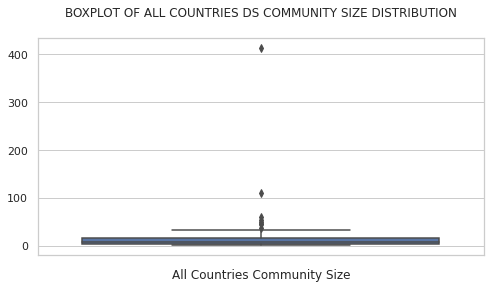

In [ ]:
# Show the Boxplot of DS community size distribution
plt.figure(figsize=(8,4))
sns.boxplot(df_country["Community Size"], orient = "v")
plt.title("BOXPLOT OF ALL COUNTRIES DS COMMUNITY SIZE DISTRIBUTION\n")
plt.xlabel('All Countries Community Size')
plt.ylabel("")
plt.show()

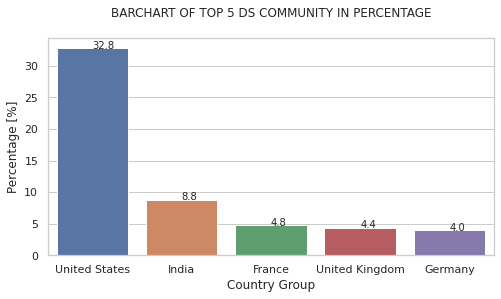

In [ ]:
#calculate percentages by gender
top5_pct = df_country_top5["Community Size"]/df_demog_ds["Country"].count()*100
top5_pct

#plot barchart
plt.figure(figsize=(8,4))
sns.barplot(df_country_top5["Country"], top5_pct)
plt.title('BARCHART OF TOP 5 DS COMMUNITY IN PERCENTAGE\n')
for index, value in enumerate(top5_pct):
    plt.text(index, value, str(round(value,1)))
plt.xlabel('Country Group')
plt.ylabel('Percentage [%]')
plt.show()

Now we have some understanding about the country, let's see if there is any relationship between country, age and gender.

In [ ]:
print("Mean:")
for each in ["United States", "India", "Australia", "Pakistan"]:
  df = df_demog_ds.loc[(df_demog_ds["Country"] == each)]
  for gender in genders:
    df_gender = df.loc[(df["GenderSelect"] == gender)]
    print(each, gender, "mean age is %.0f" %df_gender['Age'].mean())
print("Median:")
for each in ["United States", "India", "Australia", "Pakistan"]:
  df = df_demog_ds.loc[(df_demog_ds["Country"] == each)]
  for gender in genders:
    df_gender = df.loc[(df["GenderSelect"] == gender)]
    print(each, gender, "median age is %.0f" %df_gender['Age'].median())

Mean:
United States A different identity mean age is 31
United States Female mean age is 33
United States Male mean age is 36
India A different identity mean age is nan
India Female mean age is 29
India Male mean age is 30
Australia A different identity mean age is nan
Australia Female mean age is 33
Australia Male mean age is 35
Pakistan A different identity mean age is nan
Pakistan Female mean age is nan
Pakistan Male mean age is 32
Median:
United States A different identity median age is 31
United States Female median age is 31
United States Male median age is 33
India A different identity median age is nan
India Female median age is 27
India Male median age is 28
Australia A different identity median age is nan
Australia Female median age is 31
Australia Male median age is 34
Pakistan A different identity median age is nan
Pakistan Female median age is nan
Pakistan Male median age is 27


In [ ]:
df_4_countries = df_demog_ds.loc[(df_demog_ds["Country"] == "United States")| 
                               (df_demog_ds["Country"] == "India")|
                               (df_demog_ds["Country"] == "Australia")|
                               (df_demog_ds["Country"] == "Pakistan")]

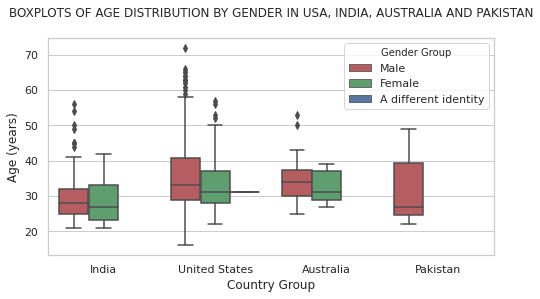

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x = df_4_countries["Country"],
            y = df_demog_ds["Age"], 
            palette=["r", "g", "b"],
            hue = df_4_countries["GenderSelect"])
plt.title("BOXPLOTS OF AGE DISTRIBUTION BY GENDER IN USA, INDIA, AUSTRALIA AND PAKISTAN\n")
plt.xlabel("Country Group")
plt.ylabel("Age (years)")
plt.legend(title = "Gender Group")
plt.show()